##Dataset and DataLoader

In [1]:
import torch
from torch.nn import Linear
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
# Dataset Class
class Data(Dataset):

# Constructor
  def __init__(self):
    torch.manual_seed(1)
    self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
    self.y = 1 * self.x - 1 + 0.1 * torch.randn(self.x.shape)
    self.len = self.x.shape[0]

  # Getter
  def __getitem__(self,index):
    return self.x[index], self.y[index]

  # Return the length
  def __len__(self):
    return self.len

In [3]:
# Create the dataset
data = Data()
X = data[:][0]
Y = data[:][1]

In [4]:
# Custom Model
import torch.nn as nn
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = self.linear(x)
    return pred

In [5]:
# Create model
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [7]:
# The function for training the model

def train_model_DataLoader(epochs):
  #model.linear.reset_parameters()
  LOSS = []

  # Loop
  for epoch in range(epochs):
    Y_pred = model.forward(X)
    loss = criterion(Y_pred, Y)
    LOSS.append(loss.item())

    for x_, y_ in trainloader:

      # make a prediction
      y_pred = model.forward(x_)

      # Backward pass: compute gradient of the loss with respect to all the learnable parameters
      loss = criterion(y_pred, y_)
      loss.backward()

      # Updata parameters slope
      optimizer.step()

      # Clear gradients
      optimizer.zero_grad()

  return LOSS

In [8]:
# Run 100 iterations
trainloader = DataLoader(dataset = data, batch_size = 60)
loss_100 = train_model_DataLoader(100)
model.state_dict()

OrderedDict([('linear.weight', tensor([[1.0100]])),
             ('linear.bias', tensor([-0.8226]))])

In [9]:
trainloader = DataLoader(dataset = data, batch_size = 15)
loss_15 = train_model_DataLoader(100)
model.state_dict()

OrderedDict([('linear.weight', tensor([[1.0057]])),
             ('linear.bias', tensor([-1.0227]))])

In [10]:
trainloader = DataLoader(dataset = data, batch_size = 1)
loss_1 = train_model_DataLoader(100)
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.9932]])),
             ('linear.bias', tensor([-1.0173]))])

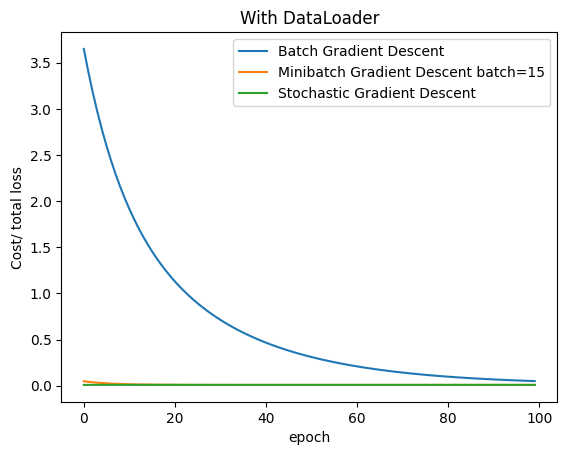

In [11]:
# Plot the LOSS_BGD and LOSS_Loader
plt.plot(loss_100,label="Batch Gradient Descent")
plt.plot(loss_15,label="Minibatch Gradient Descent batch=15")
plt.plot(loss_1,label="Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.title('With DataLoader')
plt.legend()
plt.show()

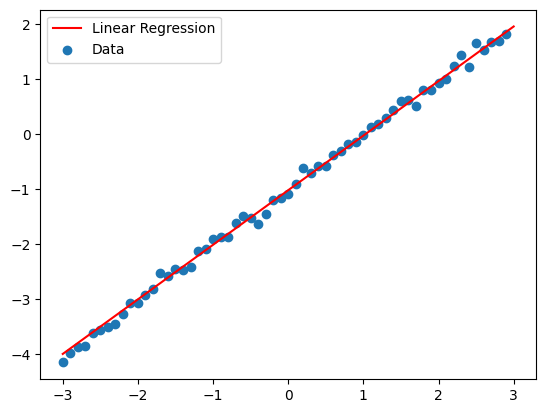

In [12]:
x1 = torch.tensor([[-3.0], [3.0]])
y1 = model.forward(x1)
plt.plot(x1.detach().numpy(), y1.detach().numpy(), 'r', label='Linear Regression')
plt.scatter(X, Y, label='Data')
plt.legend()

In [13]:
list(model.parameters())

[Parameter containing:
 tensor([[0.9932]], requires_grad=True),
 Parameter containing:
 tensor([-1.0173], requires_grad=True)]

In [14]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.9932]])),
             ('linear.bias', tensor([-1.0173]))])